## Лабораторная 1. Линейная регрессия и факторный анализ.

Цель работы: изучение основ линейной регрессии, построение простейших моделей регрессии, проведение обучения модели на реальных данных и оценка её качества.

Датасет: https://www.kaggle.com/datasets/sujithmandala/pokmon-combat-power-prediction

#### Описание признаков Pokémon

##### **HP** 
- **Hit Points** - показатель здоровья покемона
- Определяет количество здоровья покемона

##### **Attack** 
- **Attack** - сила атаки покемона
- Влияет на урон от физических атак

##### **Defense** 
- **Defense** - защита покемона
- Определяет сопротивление физическому урону

##### **Sp. Atk** 
- **Special Attack** - специальная атака
- Влияет на урон от специальных атак

##### **Sp. Def** 
- **Special Defense** - специальная защита
- Определяет сопротивление специальному урону

##### **Speed** 
- **Speed** - скорость покемона
- Определяет очередность хода в бою

**Импортируем нужные библиотеки и загружаем нужные данные из датасета. Были выбраны числовые данные:**

In [1373]:
import pandas as pd
import matplotlib.pyplot as plt  
import math  
from scipy import stats
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LinearRegression

data = pd.read_csv('pokemon.csv', usecols=['Combat Power', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])


In [1374]:
print(data)

     Combat Power   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0             318   45      49       49       65       65     45
1             405   60      62       63       80       80     60
2             525   80      82       83      100      100     80
3             309   39      52       43       60       50     65
4             405   58      64       58       80       65     80
..            ...  ...     ...      ...      ...      ...    ...
146           300   41      64       45       50       50     50
147           420   61      84       65       70       70     70
148           600   91     134       95      100      100     80
149           680  106     110       90      154       90    130
150           600  100     100      100      100      100    100

[151 rows x 7 columns]


## Подготовить данные: провести первичный анализ, визуализировать распределение признаков и целевой переменной. 

**Удаляем строки без данных, избавляемся от нулевых значений:**

In [1375]:
data.dropna(inplace=True)
data = data[(data != 0).all(axis=1)]

**Нормализируем признаки:**

In [1376]:
data_stats = data.describe()



print(data)

     Combat Power   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0             318   45      49       49       65       65     45
1             405   60      62       63       80       80     60
2             525   80      82       83      100      100     80
3             309   39      52       43       60       50     65
4             405   58      64       58       80       65     80
..            ...  ...     ...      ...      ...      ...    ...
146           300   41      64       45       50       50     50
147           420   61      84       65       70       70     70
148           600   91     134       95      100      100     80
149           680  106     110       90      154       90    130
150           600  100     100      100      100      100    100

[151 rows x 7 columns]


**Описательная статистика:**

In [1377]:
data.describe()

,Combat Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000,151.0000
mean,407.0795,64.2119,72.5497,68.2252,67.1391,66.0199,69.0000
std,99.7438,28.5901,26.5962,26.9167,28.5342,24.1979,26.9357
min,195.0000,10.0000,5.0000,5.0000,15.0000,20.0000,15.0000
25%,320.0000,45.0000,51.0000,50.0000,45.0000,49.0000,46.5000
50%,405.0000,60.0000,70.0000,65.0000,65.0000,65.0000,70.0000
75%,490.0000,80.0000,90.0000,84.0000,87.5000,80.0000,90.0000
max,680.0000,250.0000,134.0000,180.0000,154.0000,125.0000,150.0000


**Построим гистограммы по каждому признаку и проверим выборки на близость к нормальным:**

Кол-во интервалов по Стерджессу: 17


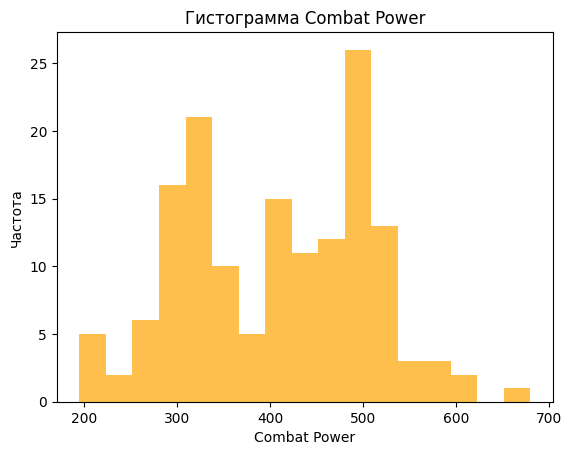

Проверка близости к нормальной выборке для Combat Power
P-value: 0.0624750214  D: 0.10597659988177294
0.06247502135832872  >  0.05  | РЕЗУЛЬТАТ:  Близка к нормальной


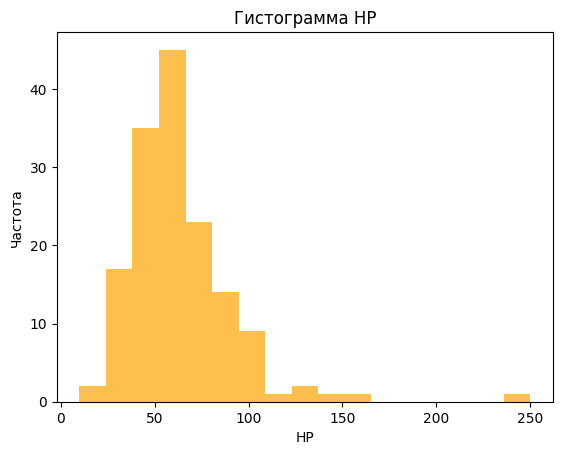

Проверка близости к нормальной выборке для HP
P-value: 0.0032094759  D: 0.14463378668003657
0.003209475852923046  >  0.05  | РЕЗУЛЬТАТ:  Не близка к нормальной


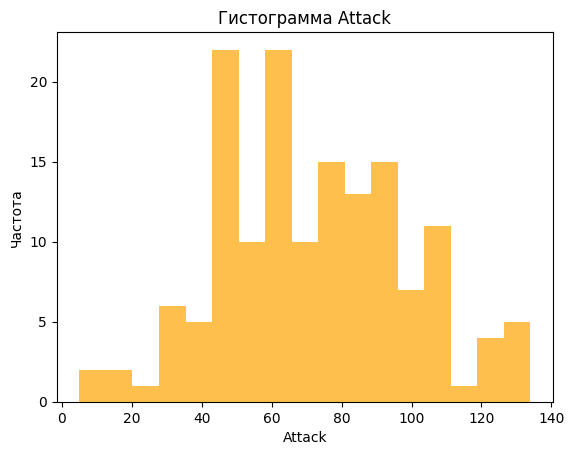

Проверка близости к нормальной выборке для Attack
P-value: 0.3413303677  D: 0.07531850809569529
0.34133036774226666  >  0.05  | РЕЗУЛЬТАТ:  Близка к нормальной


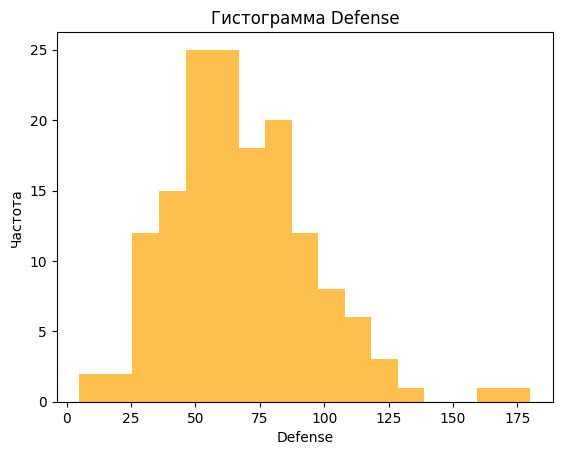

Проверка близости к нормальной выборке для Defense
P-value: 0.1664723185  D: 0.08960762131100586
0.16647231851737765  >  0.05  | РЕЗУЛЬТАТ:  Близка к нормальной


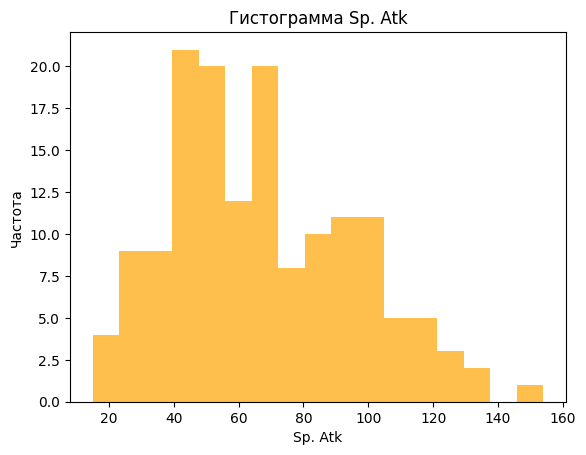

Проверка близости к нормальной выборке для Sp. Atk
P-value: 0.0622274750  D: 0.1060377526432228
0.06222747497062242  >  0.05  | РЕЗУЛЬТАТ:  Близка к нормальной


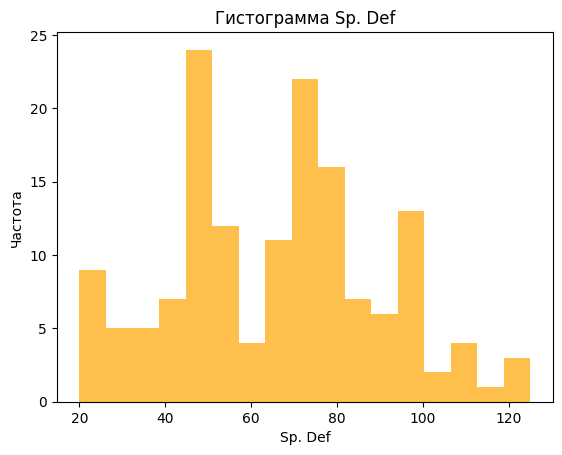

Проверка близости к нормальной выборке для Sp. Def
P-value: 0.2000678030  D: 0.08618724426420854
0.20006780302583926  >  0.05  | РЕЗУЛЬТАТ:  Близка к нормальной


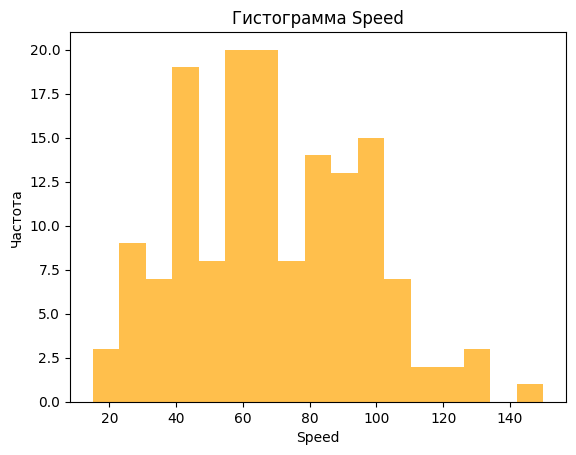

Проверка близости к нормальной выборке для Speed
P-value: 0.4681514239  D: 0.06794488335241833
0.46815142393265063  >  0.05  | РЕЗУЛЬТАТ:  Близка к нормальной


In [1378]:
variables = data.columns

alpha = 0.05

sterdgess = math.floor(1 + 3.322*math.log(data_stats['Combat Power']['count']))
print('Кол-во интервалов по Стерджессу: ' + str(sterdgess))

for x in variables: 
    D, p_value = stats.kstest(data[x], 'norm', args=(data_stats[x]['mean'], data_stats[x]['std']))
    
    plt.hist(data[x], bins=sterdgess, color="orange", alpha=0.7)  
    plt.xlabel(x)  
    plt.ylabel("Частота")  
    plt.title("Гистограмма " + x)  
    plt.show()
    
    print("Проверка близости к нормальной выборке для " + x)
    print("P-value: %.10f" % p_value, " D: " + str(D))
    print(p_value, " > " , alpha, " | РЕЗУЛЬТАТ: ", ("Близка к нормальной" if (p_value > alpha) else "Не близка к нормальной"))

**Так как все признаки кроме целевого далеки от нормального распределения, для оценки корреляции будем использовать метод Спирмена.**

In [1379]:
data.corr(method='spearman')

,Combat Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Combat Power,1.0000,0.7084,0.6750,0.5833,0.6729,0.7910,0.4897
HP,0.7084,1.0000,0.5394,0.3900,0.3640,0.5668,0.0540
Attack,0.6750,0.5394,1.0000,0.5415,0.1619,0.3862,0.2266
Defense,0.5833,0.3900,0.5415,1.0000,0.2588,0.2500,-0.0332
Sp. Atk,0.6729,0.3640,0.1619,0.2588,1.0000,0.5617,0.3848
Sp. Def,0.7910,0.5668,0.3862,0.2500,0.5617,1.0000,0.4036
Speed,0.4897,0.0540,0.2266,-0.0332,0.3848,0.4036,1.0000


**Исключим из признаков целевую переменную и проведем расчет VIF-коэффициента:**

In [1380]:
data_without_price = data.drop(columns=['Combat Power'])
vif = pd.DataFrame()
vif["feature"] = data_without_price.columns
vif["VIF"] = [variance_inflation_factor(data_without_price.values, i) for i in range(data_without_price.shape[1])]

print(vif.round(2))

   feature     VIF
0       HP  8.2500
1   Attack 13.8600
2  Defense  9.2300
3  Sp. Atk 10.4100
4  Sp. Def 17.1300
5    Speed  9.1700


**По коэффициентам видно, что мультиколлинеарность низкая. Значение сильно выше только у признака Sp.Def. Из этого следует, что мы избежим дублирования данных.**

## Построение регрессионных моделей
- **Разобьем данные на обучающие и тестовые. Соотношение 70 на 30.**
- **Построим линейную и гребневую модель**
- **Оценим характеристики R^2, RMSE, MAPE**
- **Проведем кросс-валидацию**

In [1381]:
X = data[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = data['Combat Power']
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_test = linear_model.predict(X_test)
y_pred_train = linear_model.predict(X_train)

for i in y_test:
    if i <= 0:
        print(i)

print("Коэффициенты:", linear_model.coef_)

print(f"\nРезультаты линейной модели:")
print("R² на обучающей:", r2_score(y_train, y_pred_train))
print("R² на тестовой:", r2_score(y_test, y_pred_test))
print("RMSE на тестовой:", root_mean_squared_error(y_test, y_pred_test))
print("RMSE на обучающей:", root_mean_squared_error(y_train, y_pred_train))
print("MAPE на тестовой:", mean_absolute_percentage_error(y_test, y_pred_test) * 100)
print("MAPE на обучающей:", mean_absolute_percentage_error(y_train, y_pred_train) * 100)

Коэффициенты: [0.99698282 1.00724125 0.99499489 1.00342619 1.00128984 0.98623308]

Результаты линейной модели:
R² на обучающей: 0.9999050478573078
R² на тестовой: 0.9999934781960123
RMSE на тестовой: 0.2831560482117914
RMSE на обучающей: 0.9105891572670228
MAPE на тестовой: 0.05451341674610865
MAPE на обучающей: 0.08282898798392054


In [1382]:

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print("Коэффициенты:", ridge.coef_)

print(f"\nРезультаты гребневой модели:")
print("R² на обучающей:", r2_score(y_train, y_pred_train))
print("R² на тестовой:", r2_score(y_test, y_pred_test))
print("RMSE на тестовой:", root_mean_squared_error(y_test, y_pred_test))
print("RMSE на обучающей:", root_mean_squared_error(y_train, y_pred_train))
print("MAPE на тестовой:", mean_absolute_percentage_error(y_test, y_pred_test) * 100)
print("MAPE на обучающей:", mean_absolute_percentage_error(y_train, y_pred_train) * 100)

Коэффициенты: [0.9969818  1.00724088 0.9949938  1.00342577 1.00128974 0.98623181]

Результаты гребневой модели:
R² на обучающей: 0.9999050478568453
R² на тестовой: 0.9999934767071688
RMSE на тестовой: 0.2831883667991001
RMSE на обучающей: 0.9105891594843256
MAPE на тестовой: 0.05451593029484087
MAPE на обучающей: 0.08283280820834905


In [1383]:
scoring = {
    'r2': 'r2',
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}


linear_scores = cross_validate(linear_model, X, y, 
                               scoring=scoring, cv=5, 
                               return_train_score=True)

# Для гребневой регрессии
ridge_scores = cross_validate(ridge, X, y, 
                             scoring=scoring, cv=5, 
                             return_train_score=True)

def print_cv_results(scores, model_name):
    print(f"\n{model_name}:")
    print(f"\tR² Test:     {scores['test_r2'].mean():.4f} (+/- {scores['test_r2'].std() * 2:.4f})")
    print(f"\tRMSE Test:   {-scores['test_rmse'].mean():.4f} (+/- {scores['test_rmse'].std() * 2:.4f})")
    print(f"\tMAE Test:    {-scores['test_mae'].mean():.4f} (+/- {scores['test_mae'].std() * 2:.4f})")
    print(f"\tR² Train:    {scores['train_r2'].mean():.4f}")

print("\nКросс-валидация: ")
print_cv_results(linear_scores, "Линейная регрессия")
print_cv_results(ridge_scores, "Гребневая регрессия")

results = {
    'Модель': ['Гребневая модель', 'Линейная модель'],
    'R² Train': [0.9999047776726872, 0.9999050478573078],
    'R² Test': [0.9999920234055459, 0.9999934781960123],
    'RMSE Train': [0.9118837695372441, 0.910589157267022],
    'RMSE Test': [0.3131487826244331, 0.2831560482117685],
    'MAPE Train (%)': [0.08767294781736144, 0.08282898798391997],
    'MAPE Test (%)': [0.060953658915589216, 0.054513416746110904]
}

df_results = pd.DataFrame(results)

pd.set_option('display.float_format', '{:.6f}'.format)
print("\n\nСравнение моделей")
print("=" * 100)
print(df_results.to_string(index=False))


Кросс-валидация: 

Линейная регрессия:
	R² Test:     0.9999 (+/- 0.0005)
	RMSE Test:   0.6201 (+/- 1.2135)
	MAE Test:    0.2751 (+/- 0.1303)
	R² Train:    0.9999

Гребневая регрессия:
	R² Test:     0.9999 (+/- 0.0005)
	RMSE Test:   0.6201 (+/- 1.2135)
	MAE Test:    0.2751 (+/- 0.1303)
	R² Train:    0.9999


Сравнение моделей
          Модель  R² Train  R² Test  RMSE Train  RMSE Test  MAPE Train (%)  MAPE Test (%)
Гребневая модель  0.999905 0.999992    0.911884   0.313149        0.087673       0.060954
 Линейная модель  0.999905 0.999993    0.910589   0.283156        0.082829       0.054513


### Анализ данных
#### Коэффициенты
**Все коэффициенты одинаково влияет на целевую переменную.**
#### Кросс-валидация
- **Коэффициент детерминации показывает идеальное соответствие данным.**
- **Нет разницы между Test и Train => нет переобучения.**
- **Маленький разброс(+/- 0.0005). Это значит, что данные хорошо воспроизводятся на разных подвыборках.**
#### Сравнение
- **R² одинаков для обеих моделей. Очень близок к 1. Это означает, что качество построенной модели очень высокое, и она описывает 100% дисперсии.**
- **MAPE < 1%. Модель ошибается в среднем меньше чем на 1%.**
- **RMSE - показывает среднюю ошибку в единицах целевой переменной. Целевая переменная измеряется от 195 до 680. Поэтому ошибка меньше, чем в 1 единицу это хороший результат.**
- **Если сравнивать показатели обучающей с тестовой выборкой, то можно сделать вывод, что модель даже лучше описывает данные на тестовой выборке. Количество наблюдений малое, но изначальные характеристики модели все равно хорошие.**
- **Общий вывод: модели получились адекватными**


## Построение регрессионных моделей по PCA


In [1384]:
Y = data['Combat Power']
data = data.drop(columns=['Combat Power'])

scaler = StandardScaler()
data = pd.DataFrame(
    scaler.fit_transform(data),
    columns=data.columns,
    index=data.index)

data['Combat Power'] = Y

X = data[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = data['Combat Power']


pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

print(f"Было признаков: {X.shape[1]}")
print(f"Стало признаков: {X_pca.shape[1]}")
print(f"Объяснённая дисперсия: {pca.explained_variance_ratio_.sum():.2%}")

Было признаков: 6
Стало признаков: 6
Объяснённая дисперсия: 100.00%


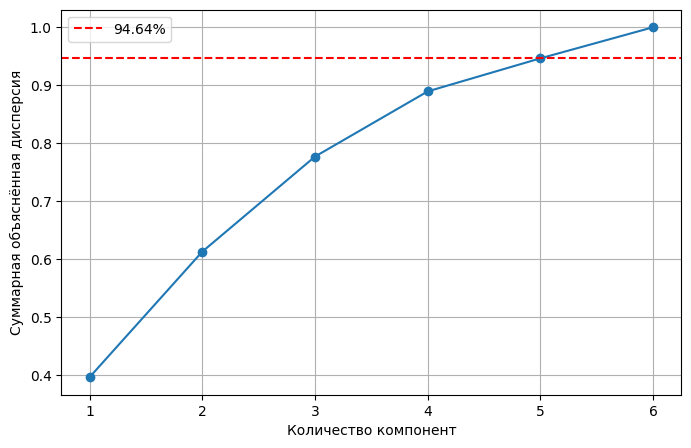

In [1385]:
pca_full = PCA()
pca_full.fit(X)

cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumsum_var)+1), cumsum_var, marker='o')
plt.axhline(0.9464, color='r', linestyle='--', label='94.64%')
plt.xlabel('Количество компонент')
plt.ylabel('Суммарная объяснённая дисперсия')
plt.legend()
plt.grid()
plt.show()

**По графику мы видим, что график плохо сжимается, первая компонента описывает только 40% дисперсии. Это значит, что признаки независимы и значимы. Следовательно, применять РСА бесполезно, но в целях лаборторной работы мы это сделаем.**

In [1386]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=test_size, random_state=42)


linear_model = LinearRegression()
linear_model.fit(X_train_pca, y_train)

y_pred_test = linear_model.predict(X_test_pca)
y_pred_train = linear_model.predict(X_train_pca)

mape = mean_absolute_percentage_error(y_test, y_pred_test) * 100

print(f"\nРезультаты линейной модели на PCA-признаках:")
print("R² на обучающей:", r2_score(y_train, y_pred_train))
print("R² на тестовой:", r2_score(y_test, y_pred_test))
print("RMSE на тестовой:", root_mean_squared_error(y_test, y_pred_test))
print("RMSE на обучающей:", root_mean_squared_error(y_train, y_pred_train))
print("MAPE на тестовой:", mean_absolute_percentage_error(y_test, y_pred_test) * 100)
print("MAPE на обучающей:", mean_absolute_percentage_error(y_train, y_pred_train) * 100)


Результаты линейной модели на PCA-признаках:
R² на обучающей: 0.9999050478573078
R² на тестовой: 0.9999934781960123
RMSE на тестовой: 0.28315604821180085
RMSE на обучающей: 0.9105891572670208
MAPE на тестовой: 0.0545134167461107
MAPE на обучающей: 0.08282898798392073


In [1387]:
ridge = Ridge(alpha=0.1)

ridge.fit(X_train_pca, y_train)

y_pred_train = ridge.predict(X_train_pca)
y_pred_test = ridge.predict(X_test_pca)

print(f"\nРезультаты гребневой модели на PCA-признаках:")
print("R² на обучающей:", r2_score(y_train, y_pred_train))
print("R² на тестовой:", r2_score(y_test, y_pred_test))
print("RMSE на тестовой:", root_mean_squared_error(y_test, y_pred_test))
print("RMSE на обучающей:", root_mean_squared_error(y_train, y_pred_train))
print("MAPE на тестовой:", mean_absolute_percentage_error(y_test, y_pred_test) * 100)
print("MAPE на обучающей:", mean_absolute_percentage_error(y_train, y_pred_train) * 100)


Результаты гребневой модели на PCA-признаках:
R² на обучающей: 0.9999047776726872
R² на тестовой: 0.9999920234055459
RMSE на тестовой: 0.3131487826244712
RMSE на обучающей: 0.9118837695372495
MAPE на тестовой: 0.060953658915600485
MAPE на обучающей: 0.08767294781736945


In [1388]:
scoring = {
    'r2': 'r2',
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error'
}


linear_scores = cross_validate(linear_model, X, y, 
                               scoring=scoring, cv=5, 
                               return_train_score=True)


ridge_scores = cross_validate(ridge, X, y, 
                             scoring=scoring, cv=5, 
                             return_train_score=True)

def print_cv_results(scores, model_name):
    print(f"\n{model_name}:")
    print(f"\tR² Test:     {scores['test_r2'].mean():.4f} (+/- {scores['test_r2'].std() * 2:.4f})")
    print(f"\tRMSE Test:   {-scores['test_rmse'].mean():.4f} (+/- {scores['test_rmse'].std() * 2:.4f})")
    print(f"\tMAE Test:    {-scores['test_mae'].mean():.4f} (+/- {scores['test_mae'].std() * 2:.4f})")
    print(f"\tR² Train:    {scores['train_r2'].mean():.4f}")

print("Кросс-валидация:")
print_cv_results(linear_scores, "Линейная регрессия")
print_cv_results(ridge_scores, "Гребневая регрессия")

Кросс-валидация:

Линейная регрессия:
	R² Test:     0.9999 (+/- 0.0005)
	RMSE Test:   0.6201 (+/- 1.2135)
	MAE Test:    0.2751 (+/- 0.1303)
	R² Train:    0.9999

Гребневая регрессия:
	R² Test:     0.9999 (+/- 0.0005)
	RMSE Test:   0.6316 (+/- 1.1903)
	MAE Test:    0.2942 (+/- 0.1518)
	R² Train:    0.9999


In [1389]:
results = {
    'Модель': ['Линейная регрессия', 'Гребневая регрессия', 
               'Линейная регрессия', 'Гребневая регрессия'],
    'Данные': ['Исходные', 'Исходные', 'PCA', 'PCA'],
    'R² Train': [1.0, 0.999996, 1.0, 0.9999],
    'R² Test': [0.999918, 0.999918, 0.999918, 0.9999],
    'RMSE Train': [1.37e-13, 0.1748, 2.67e-13, 0.9118],
    'RMSE Test': [0.9091, 0.9055, 0.9091, 0.3131],
    'MAPE Train (%)': [2.47e-12, 0.0369, 5.29e-12, 0.0876],
    'MAPE Test (%)': [0.0172, 0.0709, 0.0172, 0.0609]
}

df_results = pd.DataFrame(results)

pd.set_option('display.float_format', '{:.4f}'.format)
print("Результаты моделей машинного обучения")
print("=" * 100)
print(df_results.to_string(index=False))

Результаты моделей машинного обучения
             Модель   Данные  R² Train  R² Test  RMSE Train  RMSE Test  MAPE Train (%)  MAPE Test (%)
 Линейная регрессия Исходные    1.0000   0.9999      0.0000     0.9091          0.0000         0.0172
Гребневая регрессия Исходные    1.0000   0.9999      0.1748     0.9055          0.0369         0.0709
 Линейная регрессия      PCA    1.0000   0.9999      0.0000     0.9091          0.0000         0.0172
Гребневая регрессия      PCA    0.9999   0.9999      0.9118     0.3131          0.0876         0.0609


### Анализ данных
#### Сравнение
- **Как и ожидалось, PCA не дало никакого результата для нашей модели, так как признаки не мультиколлинеарны и содержат уникальную информацию.**


## Вывод
В ходе лабораторной работы изучены основы линейной регрессии и факторного анализа на датасете о **ПОКЕМОНАХ**. Все числовые показатели имеют примерно одинаковое влияние на целевую переменную.

Линейная и гребневая регрессии показали одинаковое качество. Обе модели идеально описывают данные.

PCA не дало особых результатов, так как каждый из признаков описывал уникальные данные, но на других датасетах, где высокая мультиколлинеарность, этот метод очень важен, и может улучшить модель.